# Análise Exploratória de Dados: Atrasos em Companhias Aéreas

## Configuração ambiente e Importação dos Dados

In [33]:
# Bilbliotecas necessárias para o estudo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Leitura dos dados Brutos desejados:
df = pd.read_csv(
    "https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv",
    index_col=0
    )
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


> Diante das informações importadas, os atrutos são definidas como:

- **year**: Inteiro - Ano do voo.
- **month**: Inteiro - Mês do voo.
- **day**: Inteiro - Dia do voo.
- **dep_time**: Float - Hora de partida.
- **dep_delay**: Float - Atraso na partida (em minutos).
- **arr_time**: Float - Hora de chegada.
- **arr_delay**: Float - Atraso na chegada (em minutos).
- **carrier**: String - Código da companhia aérea.
- **tailnum**: String - Número de cauda da aeronave.
- **flight**: Inteiro - Número do voo.
- **origin**: String - Aeroporto de origem.
- **dest**: String - Aeroporto de destino.
- **air_time**: Float - Tempo de voo (em minutos).
- **distance**: Inteiro - Distância entre os aeroportos de origem e destino (em milhas).
- **hour**: Float - Hora de partida (extraída de `dep_time`).
- **minute**: Float - Minuto de partida (extraído de `dep_time`).

## 1. Qual(s) companhia(s) registram mais atrasos?

Para determinar quais companhias aéreas registram mais atrasos, será analisado os atrasos médios e a frequência de atrasos por companhia aérea. Logo será abordado:

- Atraso médio por companhia aérea.
- Número total de voos atrasados por companhia aérea.

In [35]:
# Analisando as companhias aéreas com mais atrasos
# Contagem de voos, média e soma de atrasos por companhia:

# Gerando uma análise dos atrasos por companhia aérea:
atrasos_por_companhia = df.groupby('carrier')['arr_delay'].agg(['mean', 'count', 'sum']).reset_index()
# Renomeando as colunas para facilitar a leitura:
atrasos_por_companhia.columns = ['Companhia', 'Atraso_Medio', 'Total_Voos', 'Soma_Atrasos']

# Filtrando companhias com maiores atrasos:
atrasos_por_companhia = atrasos_por_companhia.sort_values(by='Atraso_Medio', ascending=False)

# Exibindo as 5 primeiras linhas:
atrasos_por_companhia.head()

,Companhia,Atraso_Medio,Total_Voos,Soma_Atrasos
6,F9,21.920705,681,14928.0
7,FL,20.115906,3175,63868.0
5,EV,15.796431,51108,807324.0
15,YV,15.556985,544,8463.0
10,OO,11.931034,29,346.0


**Resultados Quantitativos:**

- **<ins>F9<ins>** tem o maior atraso médio por voo, com cerca de 21,9 minutos de atraso médio por voo, seguida pela **<ins>FL<ins>**, que tem um atraso médio de 20,1 minutos. Algumas outras companhias também se destacam em termos de atrasos médios são EV e YV.

**Considerações Qualitativas:**

- Importante também considerar o volume de voos atrasados. Companhias como **<ins>EV<ins>**, apesar de não ter o maior atraso médio, apresentam um grande número de voos, o que significa que seus atrasos têm um impacto muito maior em termos absolutos. Isso pode indicar possíveis problemas operacionais relacionados à pontualidade dessa companhia.

## 2. A rota ou aeronave podem influenciar nos atrasos?

Verificar se as rotas (origem e destino) e os tipos de aeronave (número da cauda) influenciam significativamente nos atrasos. Isso pode ser feito calculando:

- Atraso médio por rota (origem-destino).
- Atraso médio por modelo de aeronave (número da cauda).

In [36]:
# Análise da influência da rota e aeronave nos atrasos
# Agrupando por rota (origem e destino) e por aeronave (número da cauda) para calcular o atraso médio:

# Atraso médio por rota (origem e destino)
atraso_por_rota = df.groupby(['origin', 'dest'])['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_rota.columns = ['Origem', 'Destino', 'Atraso_Medio']
# Colocando em ordem decrescente:
atraso_por_rota = atraso_por_rota.sort_values(by='Atraso_Medio', ascending=False)

# Atraso médio por aeronave (tailnum)
atraso_por_aeronave = df.groupby('tailnum')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_aeronave.columns = ['Numero_Aeronave', 'Atraso_Medio']
# Colocando em ordem decrescente:
atraso_por_aeronave = atraso_por_aeronave.sort_values(by='Atraso_Medio', ascending=False)

# 5 primeiras linhas - Atraso médio por rota (origem e destino)
atraso_por_rota.head()

,Origem,Destino,Atraso_Medio
13,EWR,CAE,44.585106
84,EWR,TYS,41.150160
82,EWR,TUL,33.659864
53,EWR,OKC,30.619048
36,EWR,JAC,29.894737


In [37]:
# 5 primeiras linhas - Atraso médio por aeronave (tailnum)
atraso_por_aeronave.head()

,Numero_Aeronave,Atraso_Medio
3409,N844MH,320.0
3675,N911DA,294.0
3747,N922EV,276.0
2184,N587NW,264.0
3445,N851NW,219.0


**Atrasos por Rota:**
A análise por rota (origem e destino) indica que algumas rotas partindo de EWR (Newark) apresentam os maiores atrasos médios, como:

- EWR -> CAE: Atraso médio de 44.6 minutos.
- EWR -> TYS: Atraso médio de 41.2 minutos.

Esses atrasos podem estar relacionados a fatores locais do aeroporto de origem, como clima, tráfego aéreo intenso ou problemas operacionais específicos.

**Atrasos por Aeronave:**
A análise por aeronave (número da cauda) mostra que algumas aeronaves apresentam atrasos elevados, aeronaves como:

- N844MH apresentando um atraso médio de 320 minutos.
- N911DA com um atraso médio de 294 minutos.

Esses valores podem indicar problemas operacionais ou técnicos associados a aeronaves específicas.

## 3. Existe algum padrão ou tendência nos atrasos?

Para identificar padrões ou tendências:

- Analisar os atrasos por mês ou dia para verificar tendências sazonais ou diárias.
- Verificar se há horários do dia em que os atrasos são mais frequentes.

In [38]:
# Análise de padrões nos atrasos por mês, dia, e horário
# Calculando a média de atraso por mês, dia e por hora do dia:

# Atrasos por mês:
atraso_por_mes = df.groupby('month')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_mes.columns = ['Mes', 'Atraso_Medio']
atraso_por_mes = atraso_por_mes.sort_values(by='Atraso_Medio', ascending=False)

# Atrasos por dia do mês:
atraso_por_dia = df.groupby('day')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_dia.columns = ['Dia', 'Atraso_Medio']
atraso_por_dia = atraso_por_dia.sort_values(by='Atraso_Medio', ascending=False)

# Atrasos por hora do dia:
atraso_por_hora = df.groupby('hour')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_hora.columns = ['Hora', 'Atraso_Medio']
atraso_por_hora = atraso_por_hora.sort_values(by='Atraso_Medio', ascending=False)

# 5 primeiras linhas - Atraso por mês
atraso_por_mes.head()

,Mes,Atraso_Medio
6,7,16.711307
5,6,16.481330
11,12,14.870355
3,4,11.176063
0,1,6.129972


In [39]:
# 5 primeiras linhas - Atraso por dia
atraso_por_dia.head()

,Dia,Atraso_Medio
7,8,19.072177
21,22,17.404916
22,23,16.740462
9,10,14.736009
11,12,11.138973


In [40]:
# 5 primeiras linhas - Atraso por hora do dia
atraso_por_hora.head()

,Hora,Atraso_Medio
3,3.0,287.727273
2,2.0,224.650794
1,1.0,195.959276
0,0.0,120.877854
23,23.0,90.738113


**Atrasos por Mês:**
A análise dos atrasos por mês possui um padrão interessante:

- **Julho** e **Junho** são os meses com os maiores atrasos médios, o que pode estar relacionado ao aumento do tráfego aéreo durante o verão, quando muitas pessoas viajam a lazer, além de possíveis condições climáticas desfavoráveis.

- **Dezembro** também apresenta um atraso médio elevado, possivelmente devido ao aumento nas viagens de final de ano e às condições climáticas de inverno.

**Atrasos por Dia no mês:**

- Os dias **8**, **22**, e **23** do mês apresentam os maiores atrasos médios. Esses dias podem coincidir com eventos específicos, finais de semana ou períodos de maior tráfego, o que aumenta a probabilidade de atrasos.


**Atrasos por Hora do Dia:**
Os atrasos variam significativamente conforme o horário do dia:

- As horas da madrugada, especialmente **03:00**, **02:00** e **01:00**, apresentam atrasos médios extremamente elevados. Isso pode indicar que os voos noturnos ou de madrugada estão mais suscetíveis a atrasos significativos, possivelmente devido à menor operação nos aeroportos, menos disponibilidade de pessoal e menor frequência de voos para diluir os atrasos.

- O horário 23:00 também apresenta atrasos médios altos, o que pode ser devido ao acúmulo de atrasos ao longo do dia.

## Visualizações para compreender os dados desejados

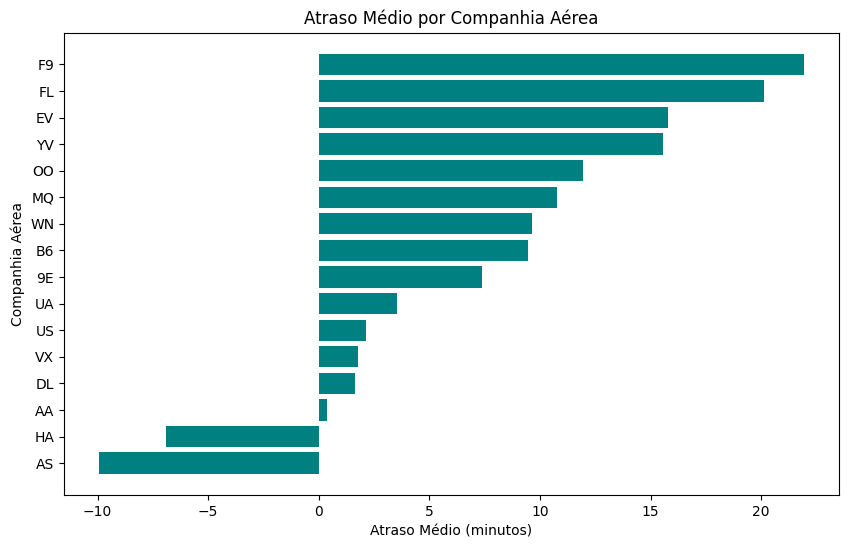

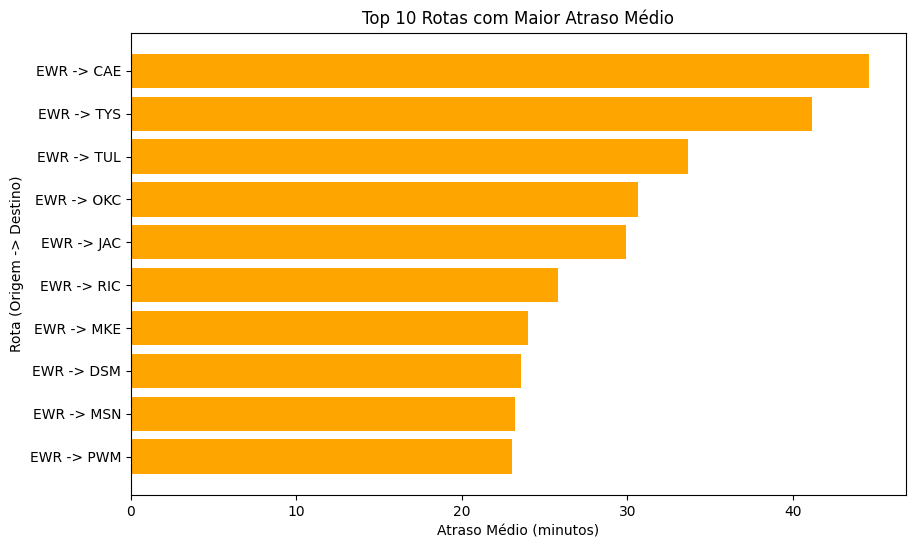

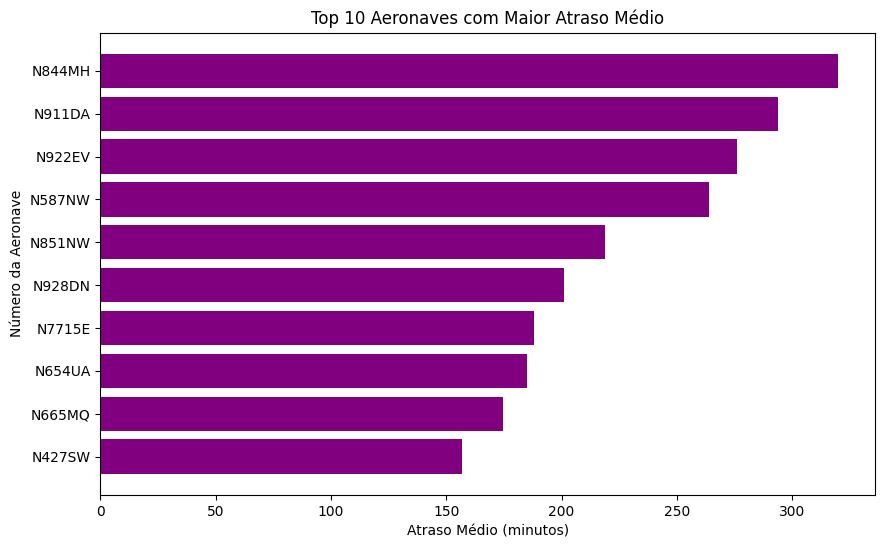

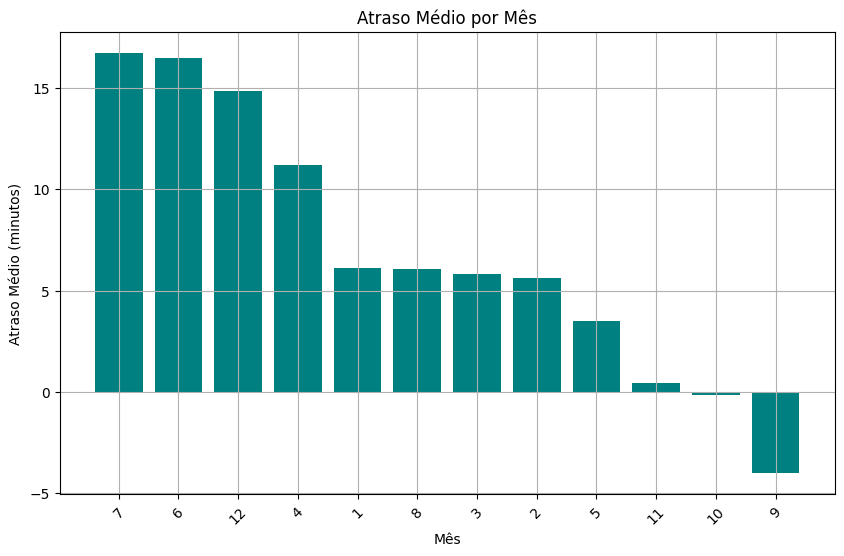

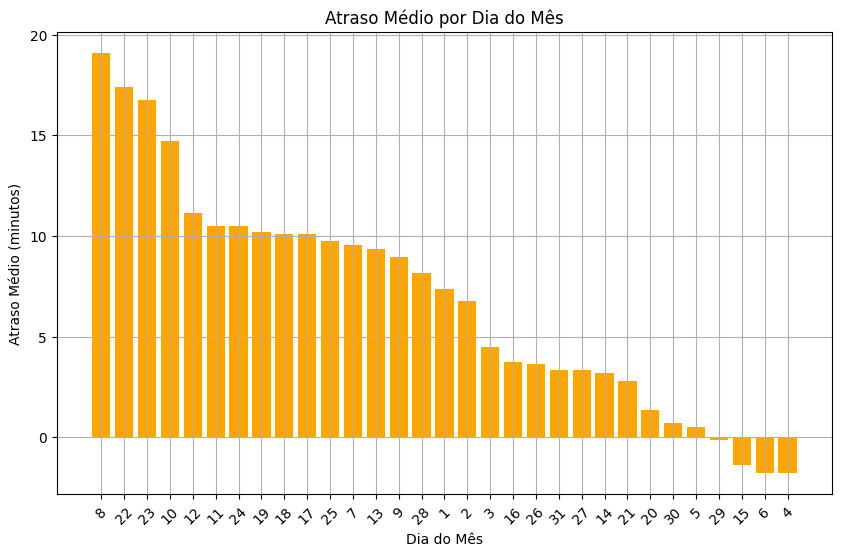

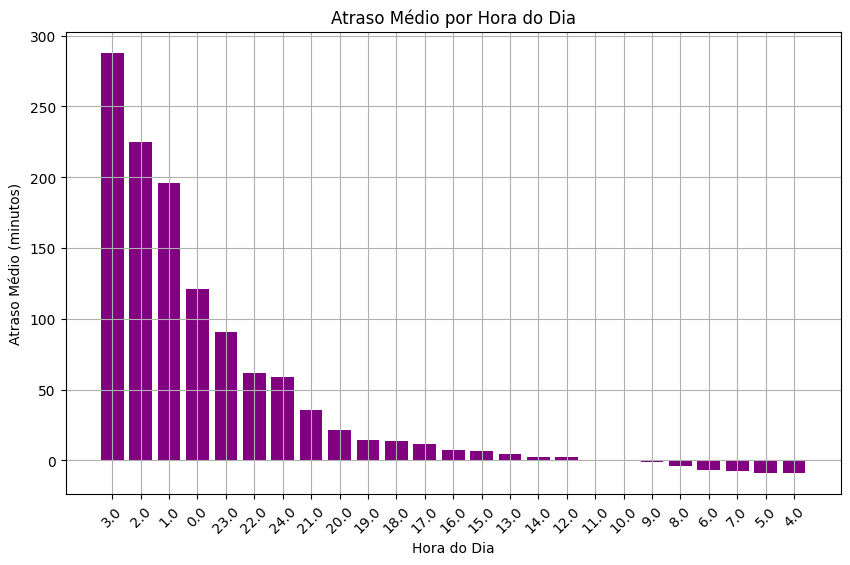

In [43]:
data = df.copy()

# 1. Gráfico: Atrasos por Companhia Aérea
plt.figure(figsize=(10, 6))
plt.barh(atrasos_por_companhia['Companhia'], atrasos_por_companhia['Atraso_Medio'], color='teal')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Companhia Aérea')
plt.title('Atraso Médio por Companhia Aérea')
plt.gca().invert_yaxis()
plt.show()

# 2. Gráfico: Atrasos por Rota (apenas as 10 maiores)
plt.figure(figsize=(10, 6))
top_rotas = atraso_por_rota.head(10)
plt.barh(top_rotas['Origem'] + ' -> ' + top_rotas['Destino'], top_rotas['Atraso_Medio'], color='orange')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Rota (Origem -> Destino)')
plt.title('Top 10 Rotas com Maior Atraso Médio')
plt.gca().invert_yaxis()
plt.show()

# 3. Gráfico: Atrasos por Aeronave (apenas as 10 maiores)
plt.figure(figsize=(10, 6))
top_aeronaves = atraso_por_aeronave.head(10)
plt.barh(top_aeronaves['Numero_Aeronave'], top_aeronaves['Atraso_Medio'], color='purple')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Número da Aeronave')
plt.title('Top 10 Aeronaves com Maior Atraso Médio')
plt.gca().invert_yaxis()
plt.show()

# 4. Gráfico: Atraso Médio por Mês
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_mes['Mes'].astype(str), atraso_por_mes['Atraso_Medio'], color='teal')
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Gráfico: Atraso Médio por Dia do Mês
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_dia['Dia'].astype(str), atraso_por_dia['Atraso_Medio'], color='orange')
plt.xlabel('Dia do Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Dia do Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 6. Gráfico: Atraso Médio por Hora do Dia
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_hora['Hora'].astype(str), atraso_por_hora['Atraso_Medio'], color='purple')
plt.xlabel('Hora do Dia')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Hora do Dia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Visualizações geradas com base nas análises **quantitativas** e **qualitativas** dos dados de atraso de voos:

- **Atraso Médio por Companhia Aérea:** Este gráfico mostra quais companhias têm os maiores atrasos médios por voo.

- **Top 10 Rotas com Maior Atraso Médio:** Este gráfico destaca as rotas específicas que apresentam os maiores atrasos médios.

- **Top 10 Aeronaves com Maior Atraso Médio:** Foca nas aeronaves (identificadas pelo número da cauda) que têm os maiores atrasos médios.

- **Atraso Médio por Mês:** Mostra a média dos atrasos para cada mês, destacando os meses com maior e menor impacto nos atrasos.

- **Atraso Médio por Dia do Mês:** Apresenta a média dos atrasos para cada dia do mês, identificando os dias críticos com maiores atrasos.

- **Atraso Médio por Hora do Dia:** Exibe a média dos atrasos ao longo das horas do dia, evidenciando as horas mais problemáticas, especialmente durante a madrugada.

Um atraso negativo em um conjunto de dados de voos refere-se a uma situação em que um voo chegou ao destino antes do horário programado. Em termos práticos:

- **Atraso Positivo:** Indica que o voo chegou depois do horário programado, resultando em um atraso.
- **Atraso Negativo:** Indica que o voo chegou antes do horário previsto, resultando em uma "adiantamento" em relação ao horário de chegada esperado.